<a href="https://colab.research.google.com/github/snehalsandy/machine-learning-/blob/master/TensorFlow_with_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow with GPU

This notebook provides an introduction to computing on a [GPU](https://cloud.google.com/gpu) in Colab. In this notebook you will connect to a GPU, and then run some basic TensorFlow operations on both the CPU and a GPU, observing the speedup provided by using the GPU.


## Enabling and testing the GPU

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

Next, we'll confirm that we can connect to the GPU with tensorflow:

TensorFlow 2.x selected.
Found GPU at: /device:GPU:0


## Observe TensorFlow speedup on GPU relative to CPU

This example constructs a typical convolutional neural network layer over a
random image and manually places the resulting ops on either the CPU or the GPU
to compare execution speed.

In [0]:
import pandas as pd
import numpy as np


In [0]:
import requests
import os


In [0]:
dress_patterns_df = pd.read_csv('dress_patterns.csv')
dress_patterns = dress_patterns_df .values


In [27]:
dress_patterns_df

,_unit_id,category,category:confidence,image_url
0,851505458,ikat,0.3487,http://s3-eu-west-1.amazonaws.com/we-attribute...
1,851505459,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
2,851505460,polka dot,0.6709,http://s3-eu-west-1.amazonaws.com/we-attribute...
3,851505461,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
4,851505462,geometry,0.7035,http://s3-eu-west-1.amazonaws.com/we-attribute...
...,...,...,...,...
15697,854497210,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
15698,854497281,floral,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
15699,854497512,squares,0.9230,http://s3-eu-west-1.amazonaws.com/we-attribute...
15700,854497595,tribal,0.5199,http://s3-eu-west-1.amazonaws.com/we-attribute...


In [28]:
category = set(dress_patterns_df['category'])
print(category)


{'stripes', 'OTHER', 'scales', 'cartoon', 'plain', 'geometry', 'skull', 'stars', 'letter_numb', 'ikat', 'houndstooth', 'squares', 'animal', 'tribal', 'polka dot', 'chevron', 'floral'}


In [29]:
print(os.listdir())
os.mkdir('dataset_category')


['.config', 'dress_patterns.csv', '.ipynb_checkpoints', 'snehal']


In [31]:
pwd

'/content'

In [32]:
for cat in category:
    print(cat)
    os.mkdir('dataset_category/'+cat)

print(os.listdir('dataset_category'))


stripes
OTHER
scales
cartoon
plain
geometry
skull
stars
letter_numb
ikat
houndstooth
squares
animal
tribal
polka dot
chevron
floral
['chevron', 'scales', 'houndstooth', 'squares', 'skull', 'polka dot', 'cartoon', 'ikat', 'letter_numb', 'animal', 'plain', 'stars', 'tribal', 'geometry', 'OTHER', 'stripes', 'floral']


In [33]:
for i in range(len(dress_patterns)):
  if i%5 == 0:
    print(i, '/', len(dress_patterns))
  pattern = dress_patterns[i]
  url = pattern[3]
  unit_id = pattern[0]
  category = pattern[1]
  try:
    r = requests.get(url, allow_redirects=True)
    open('dataset_category/'+category+'/'+str(unit_id)+'.jpg', 'wb').write(r.content)
  except:
    print('ERROR at: ', i)



0 / 15702
5 / 15702
10 / 15702
15 / 15702
20 / 15702
25 / 15702
30 / 15702
35 / 15702
40 / 15702
45 / 15702
50 / 15702
55 / 15702
60 / 15702
65 / 15702
70 / 15702
75 / 15702
80 / 15702
85 / 15702
90 / 15702
95 / 15702
100 / 15702
105 / 15702
110 / 15702
115 / 15702
120 / 15702
125 / 15702
130 / 15702
135 / 15702
140 / 15702
145 / 15702
150 / 15702
155 / 15702
160 / 15702
165 / 15702
170 / 15702
175 / 15702
180 / 15702
185 / 15702
190 / 15702
195 / 15702
200 / 15702
205 / 15702
210 / 15702
215 / 15702
220 / 15702
225 / 15702
230 / 15702
235 / 15702
240 / 15702
245 / 15702
250 / 15702
255 / 15702
260 / 15702
265 / 15702
270 / 15702
275 / 15702
280 / 15702
285 / 15702
290 / 15702
295 / 15702
300 / 15702
305 / 15702
310 / 15702
315 / 15702
320 / 15702
325 / 15702
330 / 15702
335 / 15702
340 / 15702
345 / 15702
350 / 15702
355 / 15702
360 / 15702
365 / 15702
370 / 15702
375 / 15702
380 / 15702
385 / 15702
390 / 15702
395 / 15702
400 / 15702
405 / 15702
410 / 15702
415 / 15702
420 / 15702
42

In [0]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [35]:
dress_patterns_df = pd.read_csv('dress_patterns.csv')
dress_patterns = dress_patterns_df.values
dress_patterns_df.head()

,_unit_id,category,category:confidence,image_url
0,851505458,ikat,0.3487,http://s3-eu-west-1.amazonaws.com/we-attribute...
1,851505459,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
2,851505460,polka dot,0.6709,http://s3-eu-west-1.amazonaws.com/we-attribute...
3,851505461,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
4,851505462,geometry,0.7035,http://s3-eu-west-1.amazonaws.com/we-attribute...


In [36]:

print(os.listdir('dataset_category'))
print(os.listdir('dataset_category/animal'))

['chevron', 'scales', 'houndstooth', 'squares', 'skull', 'polka dot', 'cartoon', 'ikat', 'letter_numb', 'animal', 'plain', 'stars', 'tribal', 'geometry', 'OTHER', 'stripes', 'floral']
['851568211.jpg', '851515095.jpg', '851511135.jpg', '851513925.jpg', '851514394.jpg', '851509873.jpg', '851519409.jpg', '851512315.jpg', '851516398.jpg', '851510122.jpg', '851514585.jpg', '851514720.jpg', '851519010.jpg', '851514212.jpg', '851517204.jpg', '851517980.jpg', '851518928.jpg', '851519037.jpg', '851518193.jpg', '851519260.jpg', '851512018.jpg', '851511999.jpg', '851517824.jpg', '851507284.jpg', '851512405.jpg', '851513180.jpg', '851509802.jpg', '851524336.jpg', '851510208.jpg', '851512065.jpg', '851519675.jpg', '851513903.jpg', '851518557.jpg', '851520226.jpg', '851520850.jpg', '851510460.jpg', '851513435.jpg', '851506974.jpg', '851514420.jpg', '851519431.jpg', '851510235.jpg', '851508475.jpg', '851507211.jpg', '851513756.jpg', '851519085.jpg', '851508074.jpg', '851512897.jpg', '851520292.jpg',

In [0]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 17, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [60]:
from keras.preprocessing.image import ImageDataGenerator






data_generator = ImageDataGenerator(validation_split=0.2,rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,)

train_generator = data_generator.flow_from_directory('dataset_category',target_size = (64, 64),batch_size = 32,class_mode = 'categorical', subset="training")

validation_generator = data_generator.flow_from_directory('dataset_category',target_size = (64, 64),batch_size = 32,class_mode = 'categorical', subset="validation")






Found 12567 images belonging to 17 classes.
Found 3135 images belonging to 17 classes.


In [61]:
classifier.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_10 (Dense)             (None, 17)               

In [62]:
classifier.fit_generator(training_set,steps_per_epoch = 800,epochs = 5,validation_data = test_set,validation_steps = 200)




Epoch 1/5





800/800 [==============================] - 566s 708ms/step - loss: 0.1392 - acc: 0.9528 - val_loss: 0.1335 - val_acc: 0.9562
Epoch 2/5
800/800 [==============================] - 507s 633ms/step - loss: 0.1311 - acc: 0.9575 - val_loss: 0.1242 - val_acc: 0.9597
Epoch 3/5
800/800 [==============================] - 481s 602ms/step - loss: 0.1269 - acc: 0.9590 - val_loss: 0.1244 - val_acc: 0.9603
Epoch 4/5
800/800 [==============================] - 477s 597ms/step - loss: 0.1253 - acc: 0.9592 - val_loss: 0.1180 - val_acc: 0.9613
Epoch 5/5
800/800 [==============================] - 462s 578ms/step - loss: 0.1215 - acc: 0.9604 - val_loss: 0.1250 - val_acc: 0.9581


In [63]:

model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
classifier.save_weights("model.h5")
print("Saved model to disk")
 

Saved model to disk


In [66]:
os.listdir('dataset_category/plain')

['851510452.jpg',
 '851520179.jpg',
 '851510239.jpg',
 '851515432.jpg',
 '851521089.jpg',
 '851508774.jpg',
 '851518748.jpg',
 '851520205.jpg',
 '851506890.jpg',
 '851511313.jpg',
 '851520007.jpg',
 '851513227.jpg',
 '851510617.jpg',
 '851509655.jpg',
 '851513770.jpg',
 '851513566.jpg',
 '851516223.jpg',
 '851507230.jpg',
 '851507856.jpg',
 '851518923.jpg',
 '851507186.jpg',
 '851505704.jpg',
 '851510747.jpg',
 '851519177.jpg',
 '851520751.jpg',
 '851518191.jpg',
 '851512646.jpg',
 '851513292.jpg',
 '851515668.jpg',
 '851505892.jpg',
 '851511807.jpg',
 '851518422.jpg',
 '851508201.jpg',
 '851505752.jpg',
 '851519330.jpg',
 '851518840.jpg',
 '851505486.jpg',
 '851520117.jpg',
 '851512168.jpg',
 '851518627.jpg',
 '851506685.jpg',
 '851508712.jpg',
 '851516876.jpg',
 '851508161.jpg',
 '851511433.jpg',
 '851508922.jpg',
 '851508297.jpg',
 '851518502.jpg',
 '851520818.jpg',
 '851515475.jpg',
 '851518481.jpg',
 '851515320.jpg',
 '851505939.jpg',
 '851510884.jpg',
 '851510552.jpg',
 '85150955

In [67]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset_category/plain/851505531.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

{'OTHER': 0,
 'animal': 1,
 'cartoon': 2,
 'chevron': 3,
 'floral': 4,
 'geometry': 5,
 'houndstooth': 6,
 'ikat': 7,
 'letter_numb': 8,
 'plain': 9,
 'polka dot': 10,
 'scales': 11,
 'skull': 12,
 'squares': 13,
 'stars': 14,
 'stripes': 15,
 'tribal': 16}

In [68]:
result[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [69]:
index = np.where(result[0] == 1)[0][0]
index

9

In [70]:
list(training_set.class_indices.keys())[list(training_set.class_indices.values()).index(index)]

'plain'

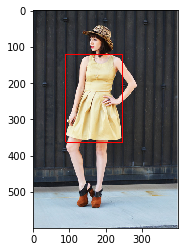

In [71]:
img = cv2.imread('dataset_category/plain/851505531.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [0]:
import os
import cv2
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import model_from_json
%matplotlib inline

In [73]:
# ----- LOAD SAVED MODEL -----
json_file = open('model.json', 'r')     
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk.")

Loaded model from disk.


In [74]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset_category',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 15702 images belonging to 17 classes.


In [75]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset_category/stripes/851506557.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_model.predict(test_image)
training_set.class_indices

{'OTHER': 0,
 'animal': 1,
 'cartoon': 2,
 'chevron': 3,
 'floral': 4,
 'geometry': 5,
 'houndstooth': 6,
 'ikat': 7,
 'letter_numb': 8,
 'plain': 9,
 'polka dot': 10,
 'scales': 11,
 'skull': 12,
 'squares': 13,
 'stars': 14,
 'stripes': 15,
 'tribal': 16}

In [76]:
result[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
      dtype=float32)

In [77]:
index = np.where(result[0] == 1)[0][0]
index

15

In [78]:
predicted_category = list(training_set.class_indices.keys())[list(training_set.class_indices.values()).index(index)]
predicted_category

'stripes'

In [79]:
path = 'dataset_category/'+ predicted_category+'/'
extension = '*.jpg'
path+extension

'dataset_category/stripes/*.jpg'

In [80]:
result = [i for i in glob.glob(path+extension)]
len(result) 

701

In [81]:
result[0]

'dataset_category/stripes/851518327.jpg'

In [0]:
img = cv2.imread(result[0])

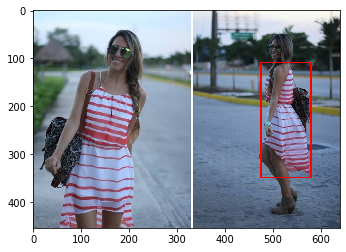

In [83]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [0]:
images = result[1:10]

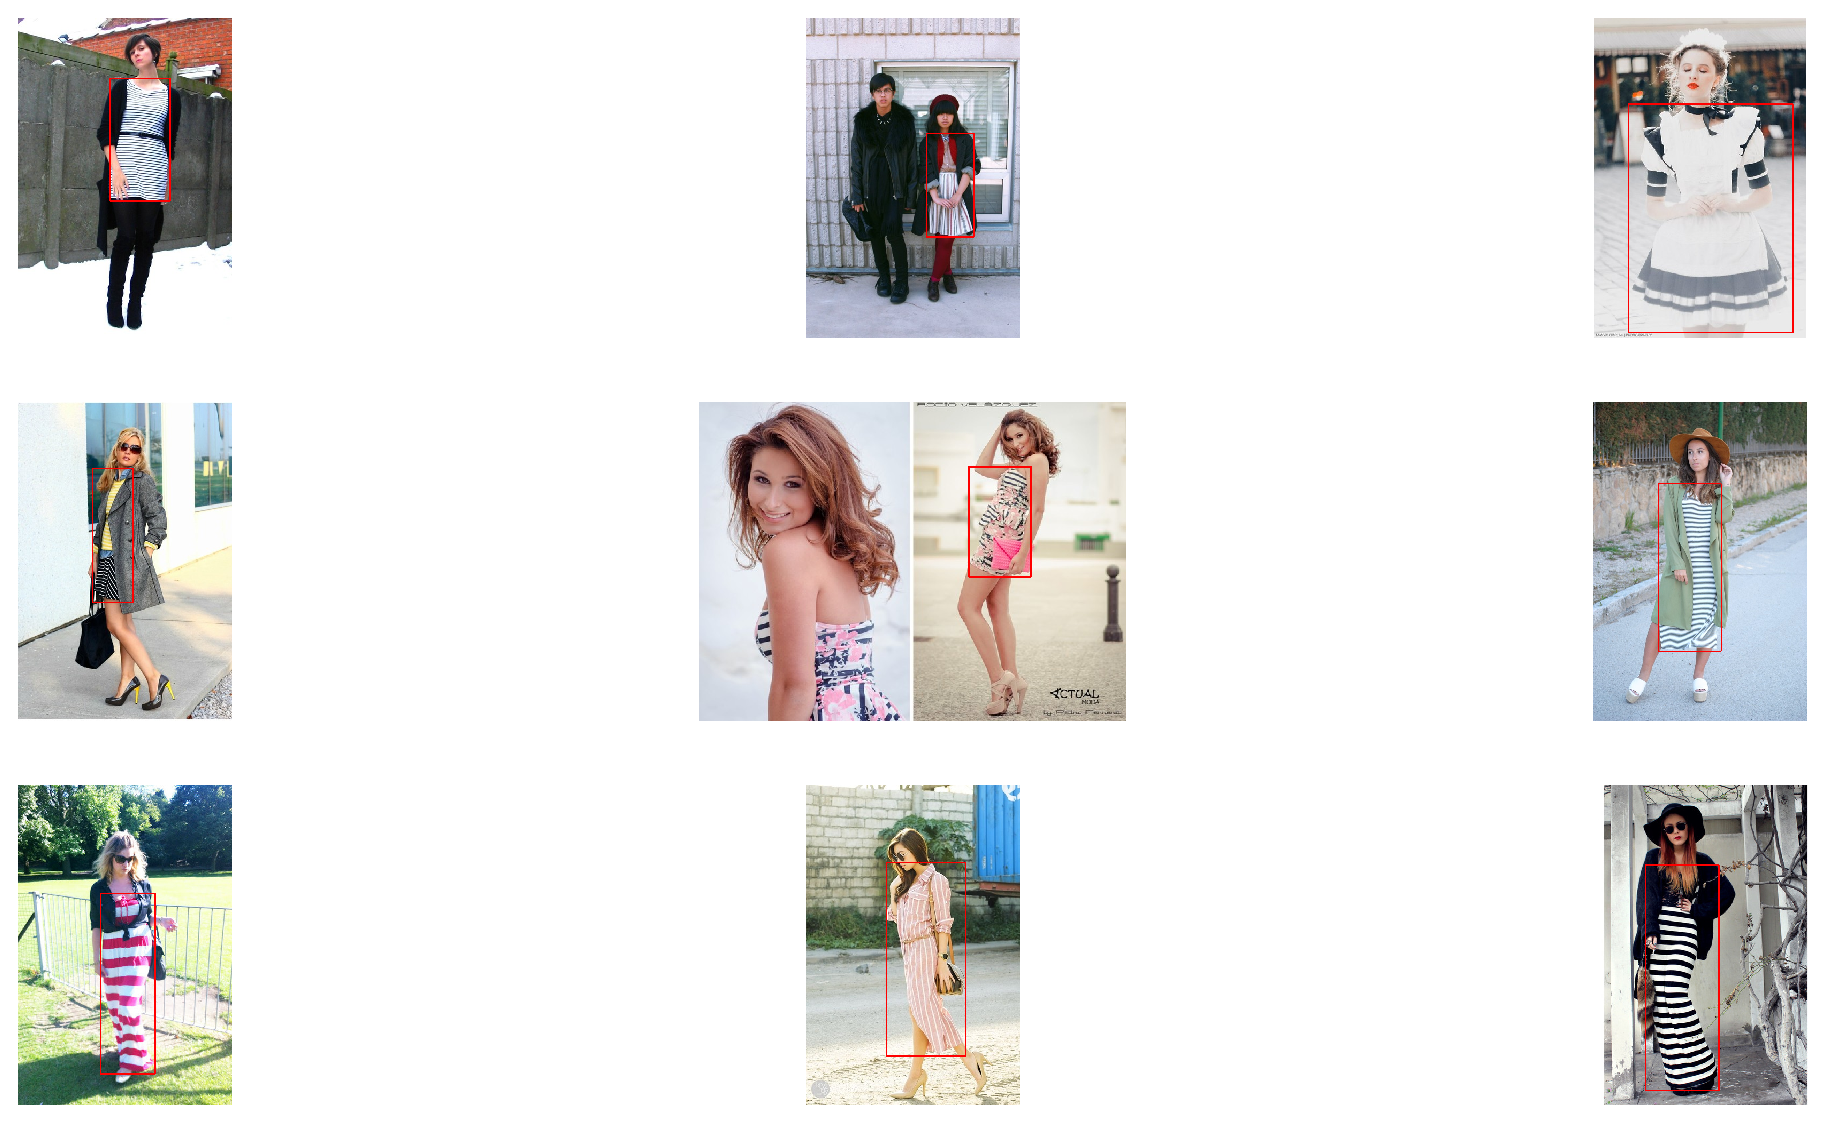

In [85]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 8), dpi=180, facecolor='w', edgecolor='k')
for i, image in enumerate(images, start=1):
    image_array = cv2.imread(image)
    
    image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
    plt.subplot(330+i)
    plt.axis('off')
    plt.imshow(image_array, cmap=plt.get_cmap('gray'))

plt.show()